##Dense Model##

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Input Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Check shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


In [3]:
# Flatten x : 28x28 → 784
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Reshape y :
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Check shapes
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (60000, 784)
Training labels shape: (60000, 1)
Test data shape: (10000, 784)
Test labels shape: (10000, 1)


In [4]:
min_pixel = np.min(x_train)
max_pixel = np.max(x_train)
print(f'pixel_values_range: {min_pixel} - {max_pixel}')

# Normalize pixel values to 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

pixel_values_range: 0 - 255


In [5]:
# Model(Dense):
Dense_model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='linear')
])

Dense_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss=SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

Dense_model.fit(x_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7889 - loss: 0.6742
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9325 - loss: 0.2279
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9453 - loss: 0.1883
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9517 - loss: 0.1586
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9563 - loss: 0.1399
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9599 - loss: 0.1291
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9623 - loss: 0.1210
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9644 - loss: 0.1149
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9672 - loss: 0.1065
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9666 - loss: 0.1021


In [6]:
# Predict:
logits = Dense_model.predict(x_test)
print(f'Shape of logits : {logits.shape}')                   # Raw Output
probs = tf.nn.softmax(logits)
print(f'Shape of probs : {probs.shape}')                    # Probabilities for each class

y_pred = np.argmax(probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shape of logits : (10000, 10)
Shape of probs : (10000, 10)


In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.96      0.98      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



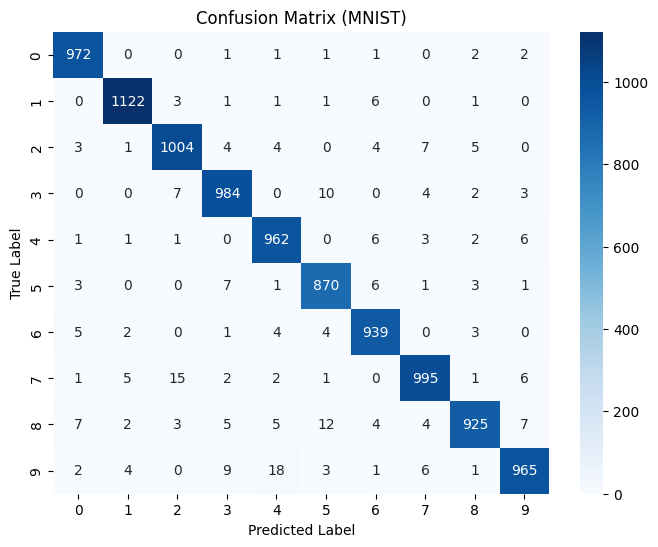

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)             # cm[i][j] --> Number of times digit i was predicted as digit j

# Create list of class labels (0 to 9)
labels = [str(i) for i in range(10)]

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MNIST)')
plt.show()


## Another Way in Dense : splitting train into (train and cross-validation)  with same neural network##


In [10]:

x_train_part, x_val, y_train_part, y_val = train_test_split(x_train, y_train, test_size=0.2)

checkpoint = ModelCheckpoint("best_model.keras", save_best_only=True, monitor="val_accuracy")

training_log = Dense_model.fit(
    x_train_part, y_train_part,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9678 - loss: 0.0985 - val_accuracy: 0.9834 - val_loss: 0.0526
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9716 - loss: 0.0945 - val_accuracy: 0.9835 - val_loss: 0.0539
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9701 - loss: 0.0907 - val_accuracy: 0.9798 - val_loss: 0.0631
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9715 - loss: 0.0908 - val_accuracy: 0.9797 - val_loss: 0.0616
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9712 - loss: 0.0900 - val_accuracy: 0.9807 - val_loss: 0.0655
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9724 - loss: 0.0848 - val_accuracy: 0.9827 - val_loss: 0.0618
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9738 - loss: 0.0811 - val_accuracy: 0.9778 - val_loss: 0.0681
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9747 - loss: 0.0790 - 

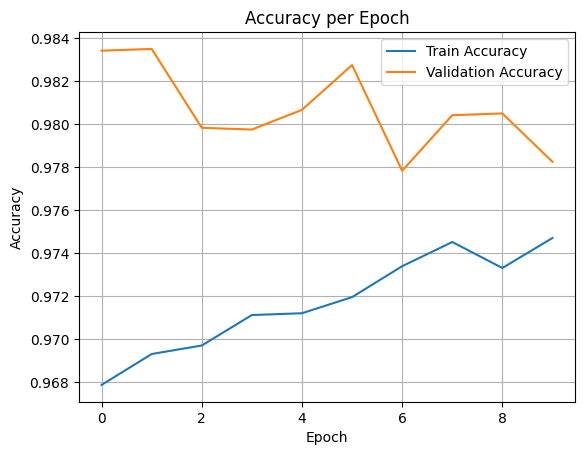

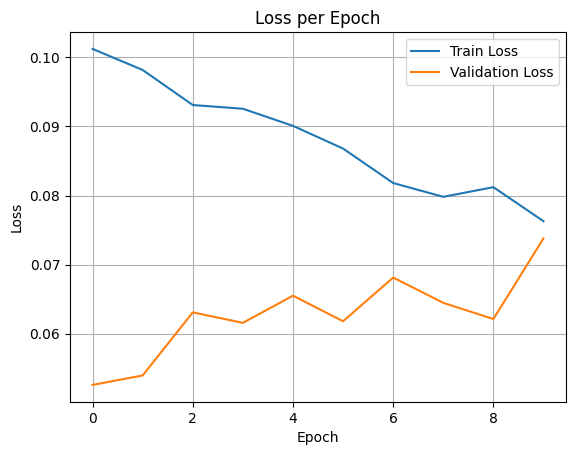

In [11]:
## Accuracy and Loss Curve

# Accuracy Curve
plt.plot(training_log.history['accuracy'], label='Train Accuracy')
plt.plot(training_log.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Curve
plt.plot(training_log.history['loss'], label='Train Loss')
plt.plot(training_log.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Predict:
logits = Dense_model.predict(x_test)
print(f'Shape of logits : {logits.shape}')                   # Raw Output
probs = tf.nn.softmax(logits)
print(f'Shape of probs : {probs.shape}')                    # Probabilities for each class

y_pred = np.argmax(probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Shape of logits : (10000, 10)
Shape of probs : (10000, 10)


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.96      0.96       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



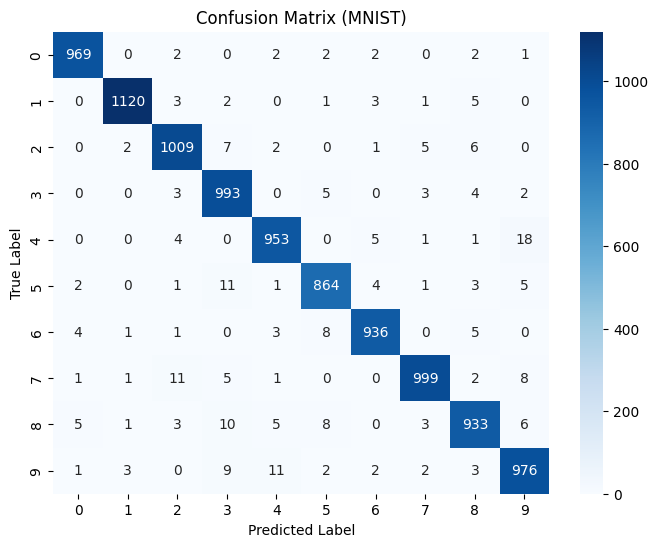

In [14]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)             # cm[i][j] --> Number of times digit i was predicted as digit j

# Create list of class labels (0 to 9)
labels = [str(i) for i in range(10)]

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (MNIST)')
plt.show()

##CNN Model##

Dense layers treat all pixels as flat numbers. <br>
CNNs detect low-to-high-level visual features automatically.  <br>
Thus CNNs have **SMARTER FEATURE EXTRACTION**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8767 - loss: 0.4040
Epoch 1: val_accuracy improved from -inf to 0.98033, saving model to cnn_best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8767 - loss: 0.4039 - val_accuracy: 0.9803 - val_loss: 0.0653
Epoch 2/10
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9787 - loss: 0.0676
Epoch 2: val_accuracy improved from 0.98033 to 0.98283, saving model to cnn_best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9787 - loss: 0.0676 - val_accuracy: 0.9828 - val_loss: 0.0574
Epoch 3/10
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9856 - loss: 0.0455
Epoch 3: val_accuracy improved from 0.98283 to 0.98842, saving model to cnn_best_model.keras
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9856 - loss: 0.0455 - val_accuracy: 0.9884 - val_loss: 0.0398
Epoch 4/10
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9893 - loss: 0.0346
Epoch

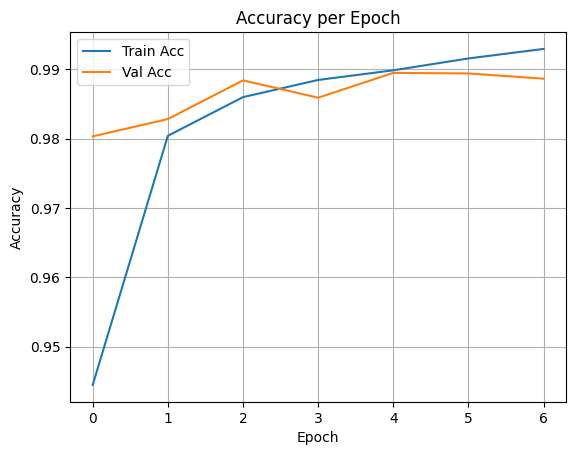

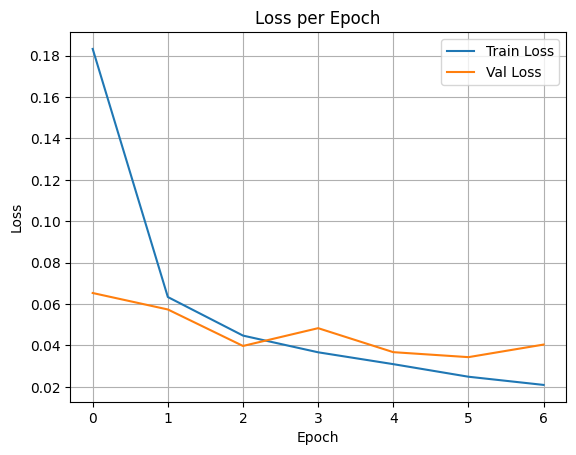

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9878 - loss: 0.0355

Test Accuracy: 0.9907
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



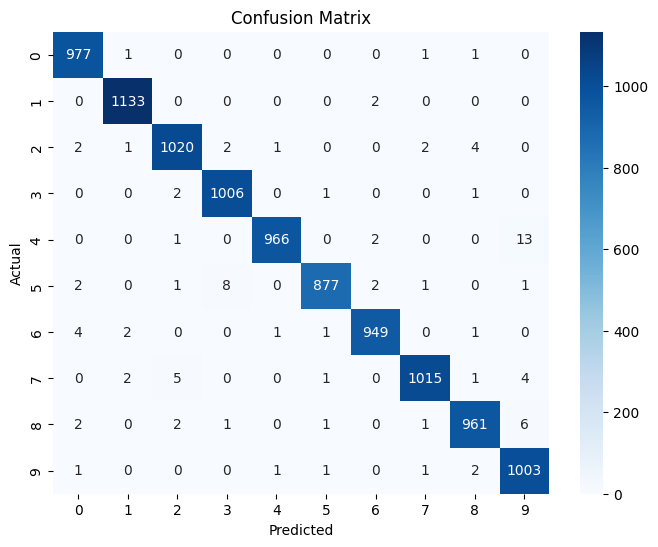

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # ✅ Added EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

# 1. Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train_part, x_val, y_train_part, y_val = train_test_split(x_train, y_train, test_size=0.2)

# 2. Define CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='linear')  # use logits
])

# 3. Compile Model
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 4. Callbacks: Checkpoint + EarlyStopping
checkpoint = ModelCheckpoint("cnn_best_model.keras", save_best_only=True, monitor="val_accuracy", verbose=1)

early_stop = EarlyStopping(
    monitor="val_accuracy",
    patience=2,
    restore_best_weights=True
)

# 5. Train the Model
training_log = cnn_model.fit(
    x_train_part, y_train_part,
    validation_data=(x_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[checkpoint, early_stop]  # ✅ Added EarlyStopping
)

# 6. Plot Accuracy and Loss
plt.plot(training_log.history['accuracy'], label='Train Acc')
plt.plot(training_log.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(training_log.history['loss'], label='Train Loss')
plt.plot(training_log.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 7. Load Best Model
best_cnn = load_model("cnn_best_model.keras")

# 8. Evaluate on Test Set
test_loss, test_acc = best_cnn.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 9. Predictions
logits = best_cnn.predict(x_test)
y_pred = np.argmax(logits, axis=1)

# 10. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 11. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = [str(i) for i in range(10)]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
